# **Getting Started With Spark using Python**

![Spark Logo](http://spark.apache.org/images/spark-logo.png)

## How to run Jupyter notebook cell ?

Jupyter Notebooks are a powerful way to write and iterate on your Python code for data analysis.The Jupyter Notebook is organized into cells. Each cell can contain code, text, or visual elements. 
Rather than writing and re-writing an entire program, Jupyter Notebooks allow you to write code in separate blocks (or “cells”) and run each block of code individually. 
Then, if you need to make a change, you can go back and make an edit and rerun the program again, all in the same window.

To select the cell, simply click on it. The selected cell will be highlighted, indicating that it is ready for execution.Once you have the desired cell selected, you have multiple options to run it: 
* Keyboard Shortcut: Press Shift + Enter on your keyboard to run the selected cell. This will execute the code or process the content within the cell and display the output below it. 
If the cell has any output, it will be shown just after running.
* Toolbar: Look for the "Run Cell" button in the toolbar at the top of the Theia Lab interface. Clicking on this button will also execute the selected cell.
After running the cell, you can see the output displayed below it. If the cell contains any code that produces visual outputs, such as plots or images, they will be shown in the output area.

To run subsequent cells, repeat the same steps: select the next cell you want to execute and use the appropriate method mentioned above.
Remember to execute cells in the correct order if there are dependencies between them.
For example,if you have variables defined in a previous cell that are needed in the current cell, make sure to run the preceding cell first.


## Objectives

In this lab, we will go over the basics of Apache Spark and PySpark. We will start with creating the SparkContext and SparkSession. We then create a dataframe and demonstrate the basics dataframes and SparkSQL. Finally we create an RDD and apply some basic transformations and actions.

## Setup

In [1]:
!pip install pyspark
!pip install matplotlib
!pip install pandas
!pip install findspark
!pip install pyarrow

In [2]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, FloatType
from pyspark.sql.functions import *
import pandas as pd
import matplotlib.pyplot as plt

## Spark Context and Spark Session

You will create the Spark Context and initialize the Spark session needed for SparkSQL and DataFrames.
SparkContext is the entry point for Spark applications and contains functions to create RDDs such as `parallelize()`. SparkSession is needed for SparkSQL and DataFrame operations.


In [3]:
# Creating a spark context class
sc = SparkContext()

# # Creating a spark session
spark = SparkSession.builder.appName("pyspark-notebook").master("spark://spark-master:7077").config("spark.executor.memory", "1024m").getOrCreate()

24/06/07 05:29:14 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/06/07 05:29:15 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [4]:
spark

#### Initialize Spark session
To work with dataframes we just need to verify that the spark session instance has been created.

In [5]:
if 'spark' in locals() and isinstance(spark, SparkSession):
    print("SparkSession is active and ready to use.")
else:
    print("SparkSession is not active. Please create a SparkSession.")

SparkSession is active and ready to use.


## Load and Display dataset

In this section, you will first read the CSV file into a Pandas DataFrame and then read it into a Spark DataFrame.
Pandas is a library used for data manipulation and analysis. Pandas offers data structures and operations for creating and manipulating Data Series and DataFrame objects. Data can be imported from various data sources, e.g., Numpy arrays, Python dictionaries, and CSV files. Pandas allows you to manipulate, organize and display the data.

| colIndex | colName            | units/description                                                                             |
|----------|--------------------|-----------------------------------------------------------------------------------------------|
| [1]    | work_year          | The year in which the data was collected (2024).                                              |
| [2]    | experience_level   | The experience level of the employee, categorized as SE (Senior Engineer), MI (Mid-Level Engineer), or EL (Entry-Level Engineer). |
| [3]    | employment_type    | The type of employment, such as full-time (FT), part-time (PT), contract (C), or freelance (F).|
| [4]    | job_title          | The title or role of the employee within the company, for example, AI Engineer.               |
| [5]    | salary             | The salary of the employee in the local currency (e.g., 202,730 USD).                         |
| [6]    | salary_currency    | The currency in which the salary is denominated (e.g., USD).                                  |
| [7]    | salary_in_usd      | The salary converted to US dollars for standardization purposes (e.g., 202,730 USD).          |
| [8]    | employee_residence | The country of residence of the employee.                                                     |
| [9]    | remote_ratio       | The ratio indicating the extent of remote work allowed in the position (0 for no remote work, 100 for fully remote). |
| [10]    | company_location   | The location of the company where the employee is employed.                                   |
| [11]    | company_size       | The size of the company, often categorized by the number of employees (S for small, M for medium, L for large). |


In [6]:
# Read the file using `read_csv` function in pandas
file_path = './data/salaries.csv'

data_engineer_salary = pd.read_csv(file_path)


In [7]:
# Display only the first 10 rows with styles
styled_salaries = data_engineer_salary.head(10).style.set_properties(**{'text-align': 'left'}) 
styled_salaries.set_table_styles([{'selector': 'th', 'props': [('text-align', 'left')]}])

# Display the styled DataFrame
display(styled_salaries)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M
5,2024,SE,FT,Machine Learning Engineer,160000,USD,160000,US,0,US,M
6,2024,MI,FT,ML Engineer,400000,USD,400000,US,0,US,M
7,2024,MI,FT,ML Engineer,65000,USD,65000,US,0,US,M
8,2024,EN,FT,Data Analyst,101520,USD,101520,US,0,US,M
9,2024,EN,FT,Data Analyst,45864,USD,45864,US,0,US,M


## DataFrames

A DataFrame is two-dimensional. Columns can be of different data types. DataFrames accept many data inputs including series and other DataFrames. You can pass indexes (row labels) and columns (column labels). Indexes can be numbers, dates, or strings/tuples.


### Load the data into Spark dataframe

In [8]:
schema = StructType([
    StructField("work_year", IntegerType(), True),
    StructField("experience_level", StringType(), True),
    StructField("employment_type", StringType(), True),
    StructField("job_title", StringType(), True),
    StructField("salary", IntegerType(), True),
    StructField("salary_currency", StringType(), True),
    StructField("salary_in_usd", IntegerType(), True),
    StructField("employee_residence", StringType(), True),
    StructField("remote_ratio", IntegerType(), True),
    StructField("company_location", StringType(), True),
    StructField("company_size", StringType(), True)
])

In [9]:
# Convert Pandas DataFrame to Spark DataFrame with defined schema
salaries_df = spark.createDataFrame(data_engineer_salary.values.tolist(), schema=schema)
# Show the DataFrame schema and some data
salaries_df.printSchema()

root
 |-- work_year: integer (nullable = true)
 |-- experience_level: string (nullable = true)
 |-- employment_type: string (nullable = true)
 |-- job_title: string (nullable = true)
 |-- salary: integer (nullable = true)
 |-- salary_currency: string (nullable = true)
 |-- salary_in_usd: integer (nullable = true)
 |-- employee_residence: string (nullable = true)
 |-- remote_ratio: integer (nullable = true)
 |-- company_location: string (nullable = true)
 |-- company_size: string (nullable = true)



###  Basic data analysis and manipulation
In this section, we perform basic data analysis and manipulation. We start with previewing the data and then applying some filtering and columwise operations.

#### Task 1:

Show the first 5 records of the DataFrame.

In [10]:
# to-do
salaries_df.show(5)

+---------+----------------+---------------+--------------------+------+---------------+-------------+------------------+------------+----------------+------------+
|work_year|experience_level|employment_type|           job_title|salary|salary_currency|salary_in_usd|employee_residence|remote_ratio|company_location|company_size|
+---------+----------------+---------------+--------------------+------+---------------+-------------+------------------+------------+----------------+------------+
|     2024|              SE|             FT|         AI Engineer|202730|            USD|       202730|                US|           0|              US|           M|
|     2024|              SE|             FT|         AI Engineer| 92118|            USD|        92118|                US|           0|              US|           M|
|     2024|              SE|             FT|       Data Engineer|130500|            USD|       130500|                US|           0|              US|           M|
|     2024

#### Task 2:
Select the `salary` and `job_title` columns from the DataFrame and display the first 5 rows of this columns.

In [11]:
# to-do
selected_columns = salaries_df.select("salary", "job_title")
selected_columns.show(5)

+------+--------------------+
|salary|           job_title|
+------+--------------------+
|202730|         AI Engineer|
| 92118|         AI Engineer|
|130500|       Data Engineer|
| 96000|       Data Engineer|
|190000|Machine Learning ...|
+------+--------------------+
only showing top 5 rows



#### Task 3: 

Display the first five rows of `salary` and `job_title` and `salary_currency` from the DataFrame where the salary is less than 50,000. 

In [12]:
# to-do
new_df = salaries_df.filter(salaries_df["salary"] < 50000)
new_df = new_df.select("job_title","salary", "salary_currency")
new_df.show(5)

+---------------+------+---------------+
|      job_title|salary|salary_currency|
+---------------+------+---------------+
|   Data Analyst| 45864|            USD|
| Data Architect| 45000|            GBP|
|   Data Analyst| 30000|            EUR|
|   Data Analyst| 25800|            EUR|
|Data Specialist| 45607|            GBP|
+---------------+------+---------------+
only showing top 5 rows



#### Task 4: 

Multiply the salary column by 0.5 and display the `salary`, `job_title`, and the newly calculated half_salary for the first five rows.

In [13]:
# to-do
new_salaries = salaries_df.withColumn("half_salary", col("salary") * 0.5)
new_salaries = new_salaries.select("salary", "job_title", "half_salary")
new_salaries.show(5)


+------+--------------------+-----------+
|salary|           job_title|half_salary|
+------+--------------------+-----------+
|202730|         AI Engineer|   101365.0|
| 92118|         AI Engineer|    46059.0|
|130500|       Data Engineer|    65250.0|
| 96000|       Data Engineer|    48000.0|
|190000|Machine Learning ...|    95000.0|
+------+--------------------+-----------+
only showing top 5 rows



#### Task 5: 

Join these two dataframes on `emp_id`.

In [14]:
# DataFrame 1 

data = [("A101", "John"), ("A102", "Peter"), ("A103", "Charlie")] 

columns = ["emp_id", "emp_name"] 

dataframe_1 = spark.createDataFrame(data, columns) 

In [15]:
# DataFrame 2 

data = [("A101", 1000), ("A102", 2000), ("A103", 3000)]

columns = ["emp_id", "salary"]

dataframe_2 = spark.createDataFrame(data, columns)

In [16]:
# to-do 
# create a new DataFrame, "combined_df" by performing an inner join
combined_df = dataframe_1.join(dataframe_2, "emp_id", "inner")
combined_df.show()

+------+--------+------+
|emp_id|emp_name|salary|
+------+--------+------+
|  A103| Charlie|  3000|
|  A102|   Peter|  2000|
|  A101|    John|  1000|
+------+--------+------+



#### Task6:

Filter the DataFrame to include only entries with experience levels "SE" (Senior Engineer) and "MI" (Mid-Level Engineer), then calculate and display the average salary for each experience level.

In [17]:
# to-do 
filtered_df = salaries_df.filter((col("experience_level") == "SE") | (col("experience_level") == "MI"))
avg_salary_df = filtered_df.groupBy("experience_level").agg(avg("salary"))

avg_salary_df.show()


+----------------+------------------+
|experience_level|       avg(salary)|
+----------------+------------------+
|              MI|157116.97672114908|
|              SE|168852.49343955013|
+----------------+------------------+



#### Task7
Write datadrame in the `HDFS` and load

In [18]:
# to-do 
hdfs_path = "hdfs://<hdfs_server>:<port> 
#+ path to save salaries_df

salaries_df.write.mode("overwrite").parquet(hdfs_path)
loaded_df = spark.read.parquet(hdfs_path)

loaded_df.show()

SyntaxError: EOL while scanning string literal (3922365574.py, line 2)

# **Introduction to SparkSQL**

Spark SQL is a Spark module for structured data processing. It is used to query structured data inside Spark programs, using either SQL or a familiar DataFrame API.

####  Create a Table View
Creating a table view in Spark SQL is required to run SQL queries programmatically on a DataFrame. A view is a temporary table to run SQL queries. A Temporary view provides local scope within the current Spark session. In this example we create a temporary view using the `createTempView()` function. Once we have a table view, we can run queries similar to querying a SQL table.


In [42]:
salaries_df.createTempView("salariess")


####  Running SQL queries and aggregating data

####  Task 8:
Display the first five records of AI Engineers with salaries over 10,000 with Spark SQL.

In [19]:
# to-do 
salaries_df.createOrReplaceTempView("engineer_salaries")

query = '''
SELECT *
FROM engineer_salaries
WHERE job_title = 'AI Engineer' AND salary > 10000
LIMIT 5
'''

result = spark.sql(query)
result.show()

+---------+----------------+---------------+-----------+------+---------------+-------------+------------------+------------+----------------+------------+
|work_year|experience_level|employment_type|  job_title|salary|salary_currency|salary_in_usd|employee_residence|remote_ratio|company_location|company_size|
+---------+----------------+---------------+-----------+------+---------------+-------------+------------------+------------+----------------+------------+
|     2024|              SE|             FT|AI Engineer|202730|            USD|       202730|                US|           0|              US|           M|
|     2024|              SE|             FT|AI Engineer| 92118|            USD|        92118|                US|           0|              US|           M|
|     2024|              MI|             FT|AI Engineer|150000|            USD|       150000|                US|         100|              US|           M|
|     2024|              MI|             FT|AI Engineer| 90200| 

#### Task 9:
Execute a SQL query to find and display the maximum salaries for job titles in `large` `US` companies, then plot the top 10 highest salaries using a horizontal bar chart.

+--------------------+----------+
|           job_title|max_salary|
+--------------------+----------+
|     BI Data Analyst|  11000000|
|Data Science Manager|   4000000|
|Applied Machine L...|    423000|
|      Data Scientist|    412000|
| Data Analytics Lead|    405000|
|  Research Scientist|    405000|
|Applied Data Scie...|    380000|
|Data Science Tech...|    375000|
|   Applied Scientist|    350000|
|Machine Learning ...|    342300|
+--------------------+----------+



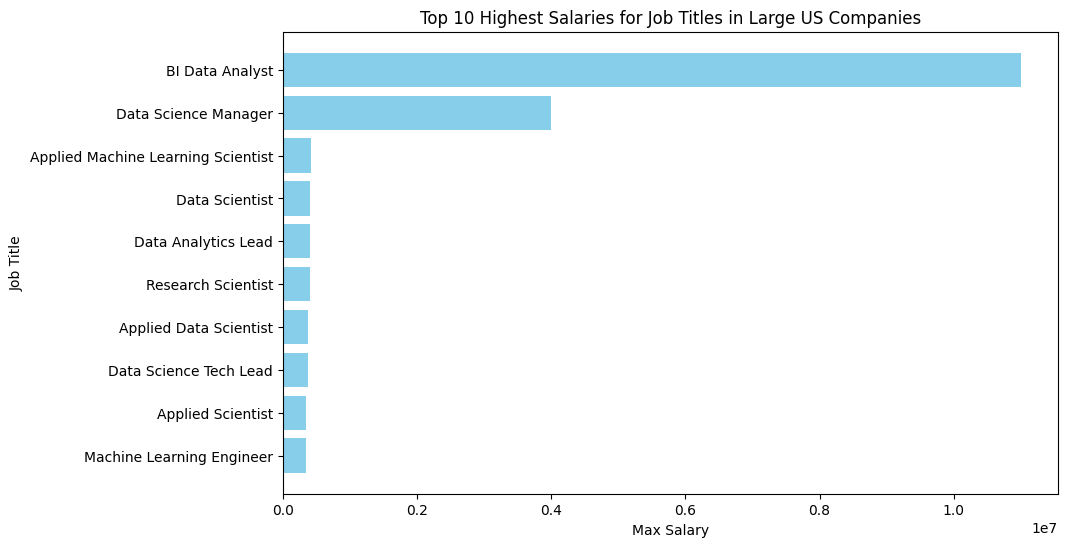

In [43]:
# to-do 
query = """
SELECT job_title, MAX(salary) as max_salary
FROM salariess
WHERE company_size = 'L' AND company_location = 'US'
GROUP BY job_title
ORDER BY max_salary DESC
LIMIT 10
"""

max_salaries_df = spark.sql(query)

max_salaries_df.show()

max_salaries_pd = max_salaries_df.toPandas()

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(max_salaries_pd['job_title'], max_salaries_pd['max_salary'], color='skyblue')
plt.xlabel('Max Salary')
plt.ylabel('Job Title')
plt.title('Top 10 Highest Salaries for Job Titles in Large US Companies')
plt.gca().invert_yaxis() 
plt.show()

#### Task 10:
Write a Spark SQL query to count the instances where a Data Engineer's salary in USD is greater than that of a Data Analyst, considering matching experience level, employment type, and company location.

In [50]:
# to do
comparison = spark.sql("SELECT COUNT(*) as salary_comparison FROM salariess s1 JOIN salariess s2 ON s1.experience_level = s2.experience_level AND s1.employment_type = s2.employment_type AND s1.company_location = s2.company_location WHERE s1.job_title = 'Data Engineer' AND s2.job_title = 'Data Analyst' AND s1.salary_in_usd > s2.salary_in_usd")
comparison.show()

+-----------------+
|salary_comparison|
+-----------------+
|          2060983|
+-----------------+



#### Create an RDD

In [22]:
# Convert DataFrame to RDD
rdd = salaries_df.rdd

#### Transformations

A transformation is an operation on an RDD that results in a new RDD. The transformed RDD is generated rapidly because the new RDD is lazily evaluated, which means that the calculation is not carried out when the new RDD is generated. The RDD will contain a series of transformations, or computation instructions, that will only be carried out when an action is called. Note the use of the lambda function.

In [23]:
high_salary_rdd = rdd.filter(lambda row: row['salary'] > 200000)

#### Actions 

A transformation returns a result to the driver. We now apply the `count()` action to get the output from the transformation.

In [24]:
high_salary_rdd.count()

3262

#### Task 11:
Create an RDD with integers from 1-50. Apply a transformation to multiply every number by 2, resulting in an RDD that contains the first 50 even numbers. 



In [29]:
numbers_rdd = spark.sparkContext.parallelize(range(1, 51))
even_numbers_rdd = numbers_rdd.map(lambda x: x*2)
even_numbers_list = even_numbers_rdd.collect()
print(even_numbers_list)

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100]


#### Task 12:
Filter and collect all records from an RDD for employees with the job title "Data Science Lead"

In [31]:
filtered_employee_rdd = salaries_df.rdd.filter(lambda row: row['job_title'] == "Data Science Lead")
data_science_lead_employees = filtered_employee_rdd.collect()

for employee in data_science_lead_employees:
    print(employee)

Row(work_year=2024, experience_level='SE', employment_type='FT', job_title='Data Science Lead', salary=185000, salary_currency='USD', salary_in_usd=185000, employee_residence='US', remote_ratio=0, company_location='US', company_size='M')
Row(work_year=2024, experience_level='SE', employment_type='FT', job_title='Data Science Lead', salary=120000, salary_currency='USD', salary_in_usd=120000, employee_residence='US', remote_ratio=0, company_location='US', company_size='M')
Row(work_year=2023, experience_level='SE', employment_type='FT', job_title='Data Science Lead', salary=148300, salary_currency='USD', salary_in_usd=148300, employee_residence='US', remote_ratio=0, company_location='US', company_size='M')
Row(work_year=2023, experience_level='SE', employment_type='FT', job_title='Data Science Lead', salary=84700, salary_currency='USD', salary_in_usd=84700, employee_residence='US', remote_ratio=0, company_location='US', company_size='M')
Row(work_year=2023, experience_level='SE', employm

#### Task 13:
Calculate the total `salary` paid by `large` companies by filtering and aggregating salary data in an RDD using Apache Spark.

In [34]:
# to do
large_company_salaries_rdd = rdd.filter(lambda x: x[0] == 'Large Company')
total_salary_large_companies = large_company_salaries_rdd.map(lambda x: x[1]).sum()

print("Total salary paid by large companies:", total_salary_large_companies)


Total salary paid by large companies: 0


#### Task 14:
Filter and display the top five highest-paying fully remote job titles based on salary.

In [35]:
# to do
fully_remote_jobs_rdd = rdd.filter(lambda row: row['remote_ratio'] == 100)
top_remote_jobs = fully_remote_jobs_rdd.map(lambda row: (row['job_title'], row['salary'])) \
                                        .sortBy(lambda x: x[1], ascending=False)

top_five_remote_jobs = top_remote_jobs.take(5)

print("Top five highest-paying fully remote job titles based on salary:")
for index, (job_title, salary) in enumerate(top_five_remote_jobs, start=1):
    print(f"{index}. Job Title: {job_title}, Salary: {salary}")

Top five highest-paying fully remote job titles based on salary:
1. Job Title: Data Scientist, Salary: 30400000
2. Job Title: Data Scientist, Salary: 6600000
3. Job Title: Data Engineer, Salary: 4450000
4. Job Title: Data Scientist, Salary: 4200000
5. Job Title: Data Scientist, Salary: 4000000


##  Create a Pandas UDF
Apache Spark has become the de-facto standard in processing big data. To enable data scientists to leverage the value of big data, Spark added a Python API in version 0.7, with support for user-defined functions (UDF). These user-defined functions operate one-row-at-a-time, and thus suffer from high serialization and invocation overhead. As a result, many data pipelines define UDFs in Java and Scala and then invoke them from Python.

Pandas UDFs built on top of Apache Arrow bring you the ability to define low-overhead, high-performance UDFs entirely in Python.

In addition, UDFs can be registered and invoked in SQL out of the box by registering a regular python function using the `@pandas_udf()` decorator.  

[pyspark.sql.functions.udf](https://spark.apache.org/docs/3.1.3/api/python/reference/api/pyspark.sql.functions.udf.html)

[pyspark.sql.DataFrame.withColumn](https://spark.apache.org/docs/3.1.3/api/python/reference/api/pyspark.sql.DataFrame.withColumn.html)


#### Task15:
Implement a Pandas UDF in PySpark named `categorize_salary` that accepts a pandas Series containing salaries and categorizes each salary into "Low" (less than $50,000), "Medium" ($50,000 to $149,999), or "High" ($150,000 and above) by returning a new Series with these categories.

In [38]:
def categorize_salary(salaries: pd.Series) -> pd.Series:
    categories = []
    for salary in salaries:
        if salary < 50000:
            categories.append("Low")
        elif 50000 <= salary < 150000:
            categories.append("Medium")
        else:
            categories.append("High")
    return pd.Series(categories)


categorize_salary_udf = pandas_udf(categorize_salary, returnType=StringType())
categorized_df = salaries_df.withColumn("salary_category", categorize_salary_udf(salaries_df['salary']))

categorized_df.show()


+---------+----------------+---------------+--------------------+------+---------------+-------------+------------------+------------+----------------+------------+---------------+
|work_year|experience_level|employment_type|           job_title|salary|salary_currency|salary_in_usd|employee_residence|remote_ratio|company_location|company_size|salary_category|
+---------+----------------+---------------+--------------------+------+---------------+-------------+------------------+------------+----------------+------------+---------------+
|     2024|              SE|             FT|         AI Engineer|202730|            USD|       202730|                US|           0|              US|           M|           High|
|     2024|              SE|             FT|         AI Engineer| 92118|            USD|        92118|                US|           0|              US|           M|         Medium|
|     2024|              SE|             FT|       Data Engineer|130500|            USD|       

#### Task 16:
Integrate the `categorize_salary` UDF into a PySpark DataFrame by adding a new column salary_category which classifies each salary. Subsequently, display the original salary and its corresponding category to verify the successful application of the UDF.

In [39]:
# to do
def categorize_salary(salary):
    if salary < 50000:
        return 'Low'
    elif salary < 100000:
        return 'Medium'
    else:
        return 'High'
    
categorize_salary_udf = udf(categorize_salary, StringType())

salaries_df_with_category = salaries_df.withColumn('salary_category', categorize_salary_udf('salary'))

salaries_df_with_category.select('salary', 'salary_category').show(5)

+------+---------------+
|salary|salary_category|
+------+---------------+
|202730|           High|
| 92118|         Medium|
|130500|           High|
| 96000|         Medium|
|190000|           High|
+------+---------------+
only showing top 5 rows



In [ ]:
spark.stop()

## Authors
[Mohammad Rahmanian](https://github.com/Mohammad-Rahmanian)

### Other Contributors
[Mohammad Sadegh Mohammadi](https://github.com/sadegh-msm)